# EDA

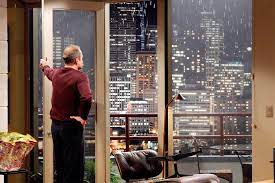

In [45]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('max_columns', 200)


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [46]:

# Read data file from the data folder into a dataframe
df_housing = pd.read_csv('data/eda.csv')
df_housing_original = pd.read_csv('data/eda.csv')

In [47]:
# Explore the coloumn names and some descriptive statistics

df_housing_original.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id.1'],
      dtype='object')

In [48]:
df_housing[['sqft_living15','sqft_living','sqft_lot','sqft_lot15','house_id','condition','grade']].head(10)

,sqft_living15,sqft_living,sqft_lot,sqft_lot15,house_id,condition,grade
0,1340.000,1180.000,5650.000,5650.000,7129300520,3,7
1,1690.000,2570.000,7242.000,7639.000,6414100192,3,7
2,2720.000,770.000,10000.000,8062.000,5631500400,3,6
3,1360.000,1960.000,5000.000,5000.000,2487200875,5,7
4,1800.000,1680.000,8080.000,7503.000,1954400510,3,8
5,4760.000,5420.000,101930.000,101930.000,7237550310,3,11
6,2238.000,1715.000,6819.000,6819.000,1321400060,3,7
7,1650.000,1060.000,9711.000,9711.000,2008000270,3,7
8,1780.000,1780.000,7470.000,8113.000,2414600126,3,7
9,2390.000,1890.000,6560.000,7570.000,3793500160,3,7


In [49]:
#drop columns are not needed
df1 = df_housing_original.copy()
df1 = df1.drop(['id'], axis=1)
df1 = df1.drop(['id.1'], axis=1)
df1.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520
1,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,...,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192


In [50]:
#List all the column names
df1.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id'],
      dtype='object')

In [51]:
#rename coloumns to nice informative names without changing actual naming

df1.columns = df1.columns.map({ 'bedrooms': 'Bedrooms', 'bathrooms': 'Bathrooms', 'sqft_living': 'Living_space', 'sqft_lot':'Lot_space', 'floors':'Floors',
       'waterfront':'Waterfront', 'view':'Viewed', 'condition':'Overall_condition', 'grade':'Grade_county', 'sqft_above':'Area_apartment',
       'sqft_basement':'Basement_space', 'yr_built':'Year_built', 'yr_renovated':'Year_Renovated', 'zipcode':'Zipcode', 'lat':'Latitude', 'long':'Longitude',
       'sqft_living15':'Neighbour15_living', 'sqft_lot15':'Lot_Neighbour15', 'date':'Date', 'price':'Price', 'house_id':'House_id'}
       )

In [52]:
#check for the type of the features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bedrooms            21597 non-null  float64
 1   Bathrooms           21597 non-null  float64
 2   Living_space        21597 non-null  float64
 3   Lot_space           21597 non-null  float64
 4   Floors              21597 non-null  float64
 5   Waterfront          19206 non-null  float64
 6   Viewed              21534 non-null  float64
 7   Overall_condition   21597 non-null  int64  
 8   Grade_county        21597 non-null  int64  
 9   Area_apartment      21597 non-null  float64
 10  Basement_space      21145 non-null  float64
 11  Year_built          21597 non-null  int64  
 12  Year_Renovated      17749 non-null  float64
 13  Zipcode             21597 non-null  int64  
 14  Latitude            21597 non-null  float64
 15  Longitude           21597 non-null  float64
 16  Neig

In [9]:
#for float type features, do the descriptive statistics
df1.describe()

,Bedrooms,Bathrooms,Living_space,Lot_space,Floors,Waterfront,Viewed,Overall_condition,Grade_county,Area_apartment,Basement_space,Year_built,Year_Renovated,Zipcode,Latitude,Longitude,Neighbour15_living,Lot_Neighbour15,Price,House_id
count,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771
std,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748
min,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000
25%,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000
50%,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000
75%,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000
max,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000


In [10]:
### Checking the value where bedroom and bathroom are 0 

df1[df1['Bedrooms'] < 1]

,Bedrooms,Bathrooms,Living_space,Lot_space,Floors,Waterfront,Viewed,Overall_condition,Grade_county,Area_apartment,...,Year_built,Year_Renovated,Zipcode,Latitude,Longitude,Neighbour15_living,Lot_Neighbour15,Date,Price,House_id


In [11]:
df1[df1['Bathrooms'] < 1]

,Bedrooms,Bathrooms,Living_space,Lot_space,Floors,Waterfront,Viewed,Overall_condition,Grade_county,Area_apartment,...,Year_built,Year_Renovated,Zipcode,Latitude,Longitude,Neighbour15_living,Lot_Neighbour15,Date,Price,House_id
208,2.000,0.750,900.000,9600.000,1.000,0.000,0.000,3,6,900.000,...,1941,0.000,98166,47.460,-122.339,1250.000,14280.000,2014-11-23,180250.000,1222000055
264,1.000,0.750,760.000,10079.000,1.000,1.000,4.000,5,5,760.000,...,1936,0.000,98070,47.468,-122.438,1230.000,14267.000,2014-10-27,369900.000,2123039032
350,1.000,0.750,560.000,12120.000,1.000,NaN,0.000,3,4,560.000,...,1967,0.000,98014,47.675,-121.854,1300.000,19207.000,2014-06-04,299000.000,7325600160
465,1.000,0.750,430.000,5050.000,1.000,NaN,0.000,2,4,430.000,...,1912,0.000,98014,47.650,-121.909,1200.000,7500.000,2014-05-23,80000.000,8658300340
569,2.000,0.750,1160.000,15029.000,1.000,0.000,0.000,4,6,870.000,...,1937,0.000,98014,47.693,-121.870,1870.000,25346.000,2014-12-18,405000.000,4045500710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19183,3.000,0.750,1240.000,4000.000,1.000,0.000,0.000,4,7,1240.000,...,1968,0.000,98112,47.624,-122.297,1460.000,4000.000,2015-01-22,699999.000,5016001619
19329,2.000,0.750,720.000,5040.000,1.000,0.000,0.000,3,4,720.000,...,1949,NaN,98106,47.532,-122.347,1290.000,4120.000,2015-03-01,151000.000,2114700090
20001,1.000,0.750,740.000,1284.000,1.000,0.000,0.000,4,6,740.000,...,1928,0.000,98107,47.674,-122.406,1430.000,3988.000,2014-09-23,290000.000,1025039168
21594,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,1020.000,...,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141


In [12]:
#ccheck the number of NaN in the features
df_housing.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id.1                0
dtype: int64

In [13]:
df1.query('Waterfront == 1')

,Bedrooms,Bathrooms,Living_space,Lot_space,Floors,Waterfront,Viewed,Overall_condition,Grade_county,Area_apartment,...,Year_built,Year_Renovated,Zipcode,Latitude,Longitude,Neighbour15_living,Lot_Neighbour15,Date,Price,House_id
49,3.000,2.500,2753.000,65005.000,1.000,1.000,2.000,5,9,2165.000,...,1953,0.000,98070,47.404,-122.451,2680.000,72513.000,2015-03-11,1350000.000,822039084
230,2.000,1.750,1450.000,15798.000,2.000,1.000,4.000,3,7,1230.000,...,1915,19780.000,98166,47.450,-122.375,2030.000,13193.000,2015-04-13,655000.000,8096000060
246,4.000,2.500,3650.000,8354.000,1.000,1.000,4.000,3,9,1830.000,...,2000,0.000,98074,47.634,-122.072,3120.000,18841.000,2014-09-29,2400000.000,2025069065
264,1.000,0.750,760.000,10079.000,1.000,1.000,4.000,5,5,760.000,...,1936,0.000,98070,47.468,-122.438,1230.000,14267.000,2014-10-27,369900.000,2123039032
300,4.000,5.000,4550.000,18641.000,1.000,1.000,4.000,3,10,2600.000,...,2002,0.000,98074,47.605,-122.077,4550.000,19508.000,2014-06-24,3080000.000,3225069065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,3.000,2.500,2830.000,4334.000,3.000,1.000,4.000,3,10,2830.000,...,2006,0.000,98074,47.632,-122.071,2830.000,38211.000,2015-03-17,1900000.000,2025069140
20309,3.000,3.500,4410.000,10756.000,2.000,1.000,4.000,3,11,3430.000,...,2014,0.000,98056,47.528,-122.205,3550.000,5634.000,2014-08-11,3000000.000,518500480
20751,4.000,4.000,4360.000,8175.000,2.500,1.000,4.000,3,10,3940.000,...,2007,0.000,98008,47.572,-122.104,2670.000,8525.000,2015-04-17,2300000.000,8043700105
21185,3.000,3.500,3760.000,5634.000,2.000,1.000,4.000,3,11,2830.000,...,2014,0.000,98056,47.529,-122.205,3560.000,5762.000,2014-10-08,2230000.000,518500460


In [14]:

#column yr_renovated was showing some diffeerent year
df1['Year_Renovated'] = df1.Year_Renovated.apply(lambda x: x/10)
#f1.yr_renovated.round(1)

In [15]:
#duplicated values
df1.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [16]:
df1.head()

,Bedrooms,Bathrooms,Living_space,Lot_space,Floors,Waterfront,Viewed,Overall_condition,Grade_county,Area_apartment,...,Year_built,Year_Renovated,Zipcode,Latitude,Longitude,Neighbour15_living,Lot_Neighbour15,Date,Price,House_id
0,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520
1,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,...,1951,1991.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192
2,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,...,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400
3,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,...,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875
4,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,...,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510


In [17]:
## finding the most common zipcode in this dataset

df1['Zipcode'].value_counts()

Zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [18]:
#Condition of the houses

df1['Overall_condition'].value_counts()

Overall_condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

In [19]:


df1['Year_built'].value_counts()

Year_built
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

In [20]:

df1['Bedrooms'].value_counts()

Bedrooms
3.000     9824
4.000     6882
2.000     2760
5.000     1601
6.000      272
1.000      196
7.000       38
8.000       13
9.000        6
10.000       3
11.000       1
33.000       1
Name: count, dtype: int64

In [21]:
df1['Bathrooms'].value_counts()


Bathrooms
2.500    5377
1.000    3851
1.750    3048
2.250    2047
2.000    1930
1.500    1445
2.750    1185
3.000     753
3.500     731
3.250     589
3.750     155
4.000     136
4.500     100
4.250      79
0.750      71
4.750      23
5.000      21
5.250      13
5.500      10
1.250       9
6.000       6
0.500       4
5.750       4
6.750       2
8.000       2
6.250       2
6.500       2
7.500       1
7.750       1
Name: count, dtype: int64

In [55]:
df1['Price'].median()

450000.0

In [61]:
#What are the qualities of houses above median

df_price_above = df1.query('Price >450000')
df_price_above.Bedrooms.value_counts()# bedrooms  3 and 4 are more in above 450000
df_price_above.Bathrooms.value_counts()#bathrooms 2.5
df_price_above.Zipcode.value_counts()#98052, 98006, 98115,98103,98117


Zipcode
98052    493
98006    451
98115    445
98103    422
98117    414
        ... 
98188     10
98031      9
98148      3
98168      2
98032      1
Name: count, Length: 69, dtype: int64

In [23]:
type(df1['Date'])

df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d')
#df1['Year_Renovated'] = pd.to_datetime(df1['Year_Renovated'],format='%Y')
df1['Year_built'] = pd.to_datetime(df1['Year_built'],format='%Y')

In [24]:
df1['Date_sold'] = df1['Date'].dt.day
df1['Month_sold'] = df1['Date'].dt.month
df1['Year_sold'] = df1['Date'].dt.year


Text(0, 0.5, 'Count')

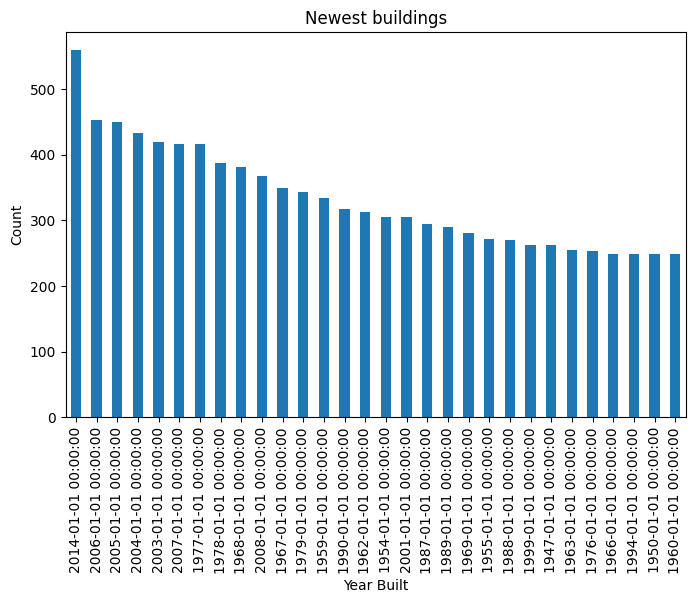

In [25]:
#Univariate analysis 
#not needed Additional information
ax = df1['Year_built'].value_counts().head(30).plot(kind='bar', title= 'Newest buildings')
ax.set_xlabel('Year Built')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

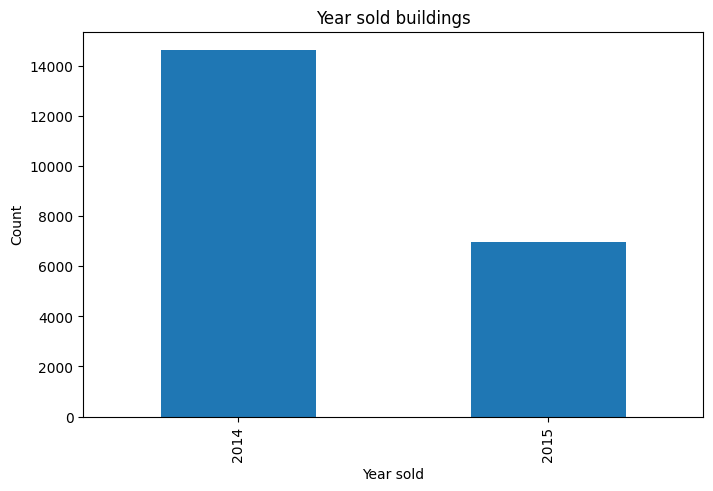

In [26]:
#not needed Additional information
ax = df1['Year_sold'].value_counts().plot(kind='bar', title= 'Year sold buildings')
ax.set_xlabel('Year sold')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

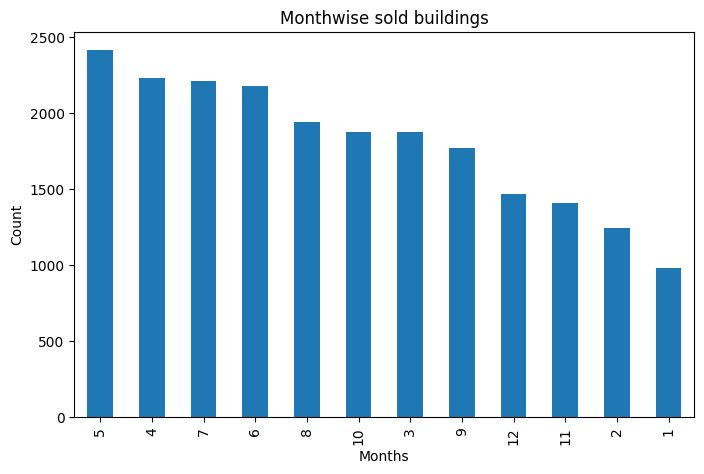

In [27]:
#not needed Additional information
ax = df1['Month_sold'].value_counts().plot(kind='bar', title= 'Monthwise sold buildings')
ax.set_xlabel('Months')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

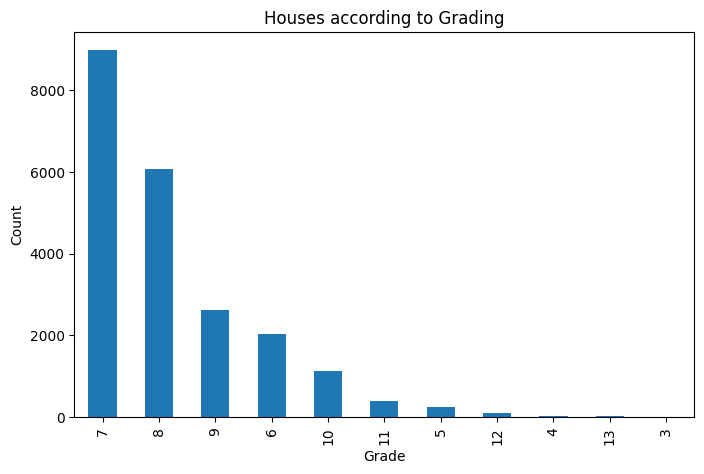

In [28]:
ax = df1['Grade_county'].value_counts().plot(kind='bar', title= 'Houses according to Grading')
ax.set_xlabel('Grade')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

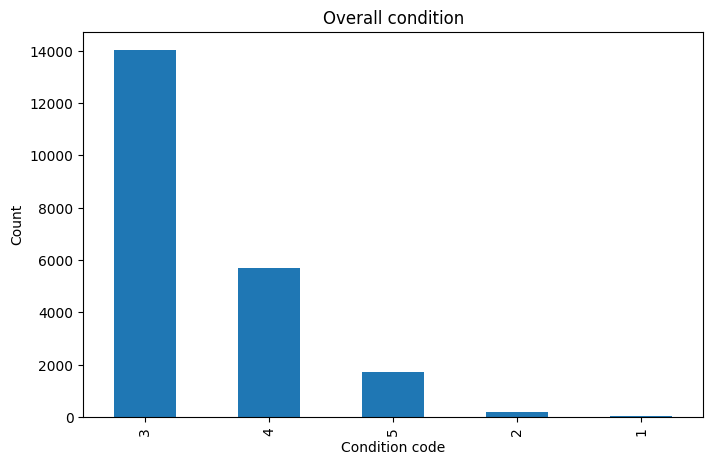

In [29]:
ax = df1['Overall_condition'].value_counts().plot(kind='bar', title= 'Overall condition')
ax.set_xlabel('Condition code')
ax.set_ylabel('Count')

<Axes: xlabel='Price', ylabel='Overall_condition'>

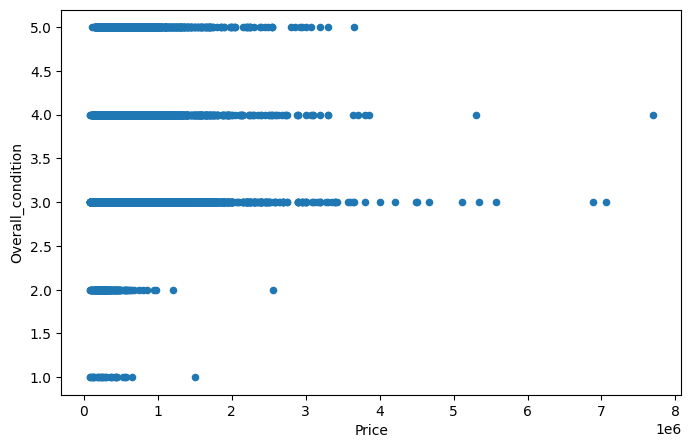

In [30]:
#Relation between the features

df1.plot(kind='scatter', x='Price',y='Overall_condition')

<Axes: xlabel='Price', ylabel='Grade_county'>

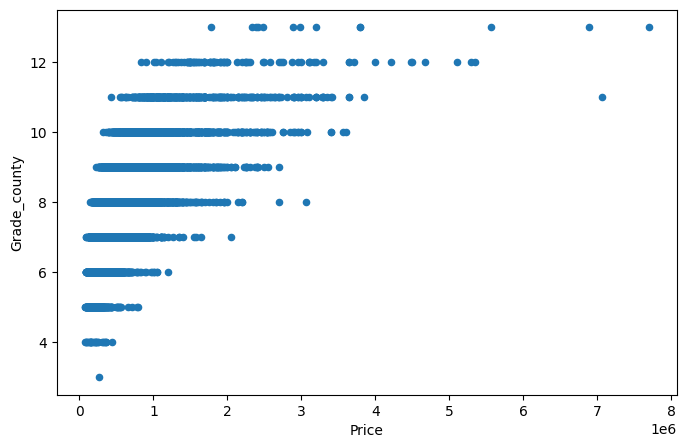

In [31]:

df1.plot(kind='scatter', x='Price',y='Grade_county')

<Axes: xlabel='Grade_county', ylabel='Price'>

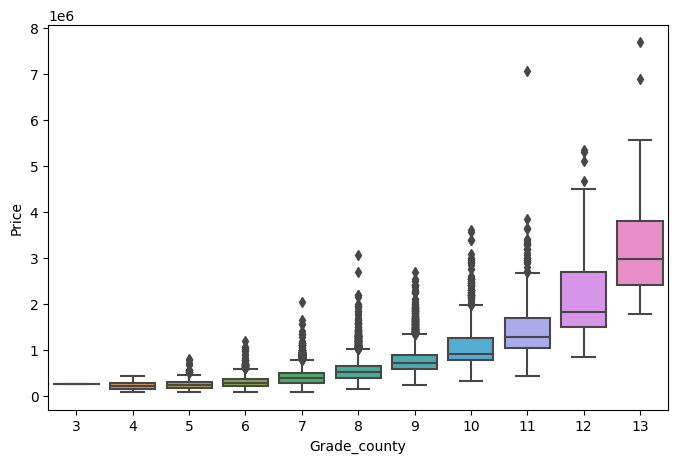

In [83]:
sns.boxplot(x = df1['Grade_county'], y = df1['Price'])

<Axes: xlabel='Overall_condition', ylabel='Price'>

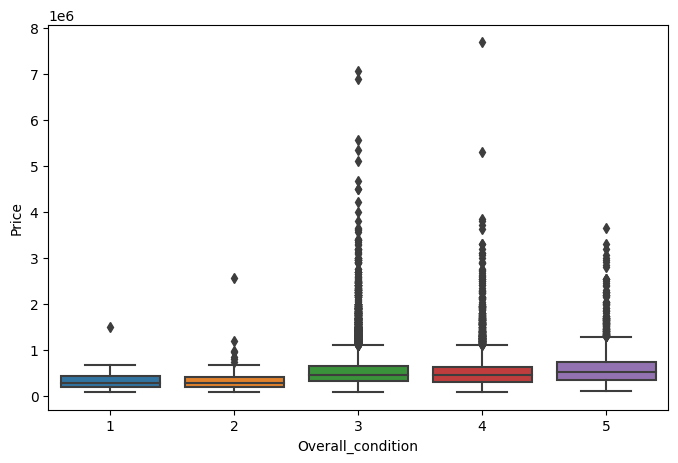

In [84]:
sns.boxplot(x = df1['Overall_condition'], y = df1['Price'])

<Axes: xlabel='Grade_county', ylabel='Price'>

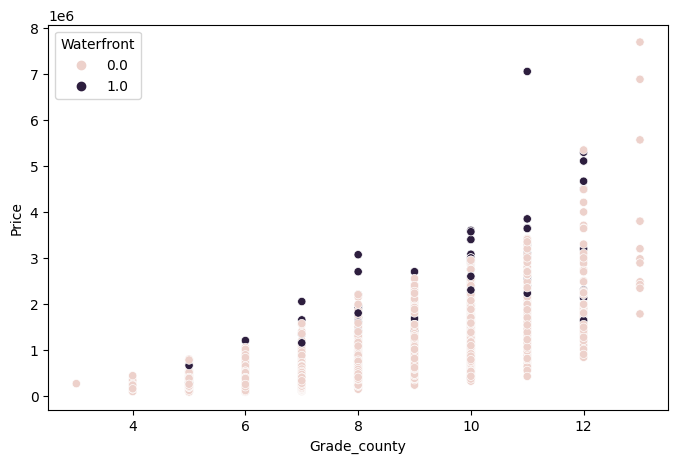

In [32]:


sns.scatterplot(data=df1, x='Grade_county', y='Price',hue='Waterfront')



<Axes: xlabel='Overall_condition', ylabel='Price'>

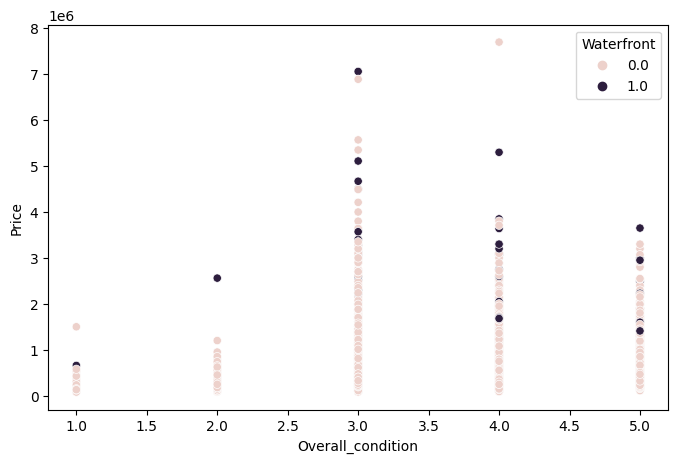

In [33]:
sns.scatterplot(data=df1, x='Overall_condition', y='Price',hue='Waterfront')

<Axes: xlabel='Overall_condition', ylabel='Grade_county'>

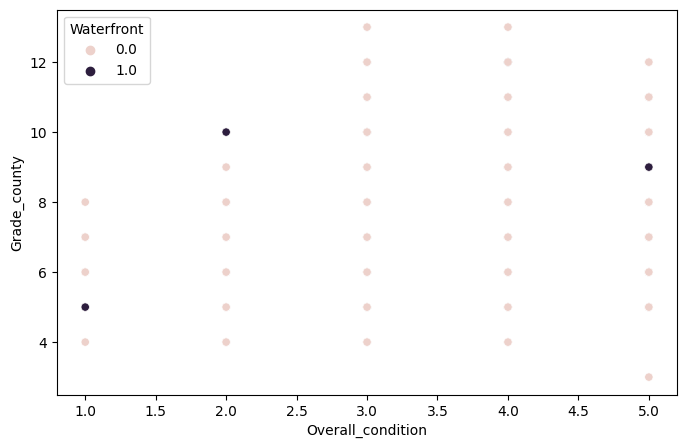

In [34]:
sns.scatterplot(data=df1, x='Overall_condition', y='Grade_county',hue='Waterfront')

In [88]:
import plotly.express as px
fig = px.scatter(df1,x='Overall_condition', y='Grade_county',symbol='Waterfront', size='Living_space')
fig.show()

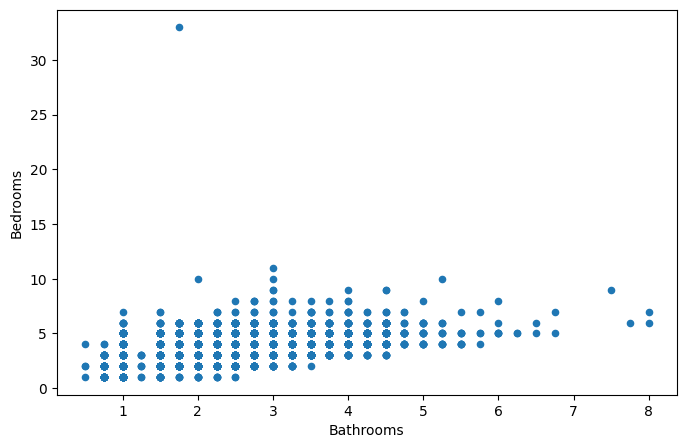

In [36]:

ax1 =df1.plot(kind='scatter', x='Bathrooms',y='Bedrooms')


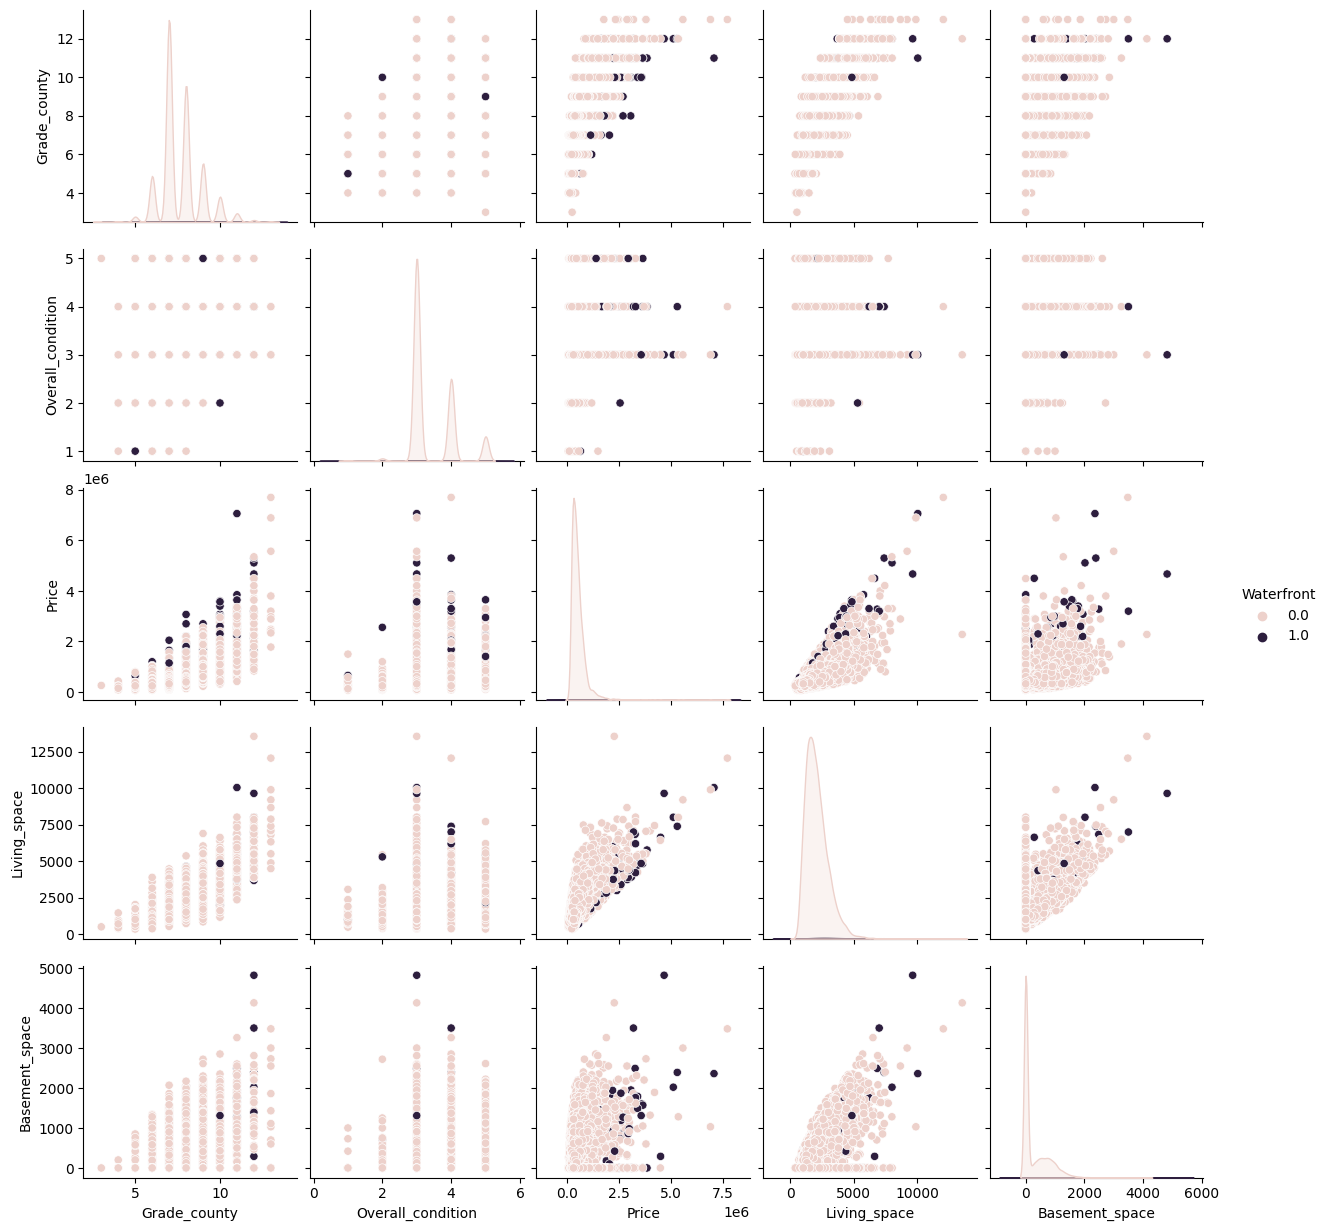

In [37]:
sns.pairplot(df1,
             vars=['Grade_county','Overall_condition',
                   'Price','Living_space','Basement_space'],
            hue='Waterfront')
plt.show()

<Axes: xlabel='Waterfront', ylabel='Price_Range'>

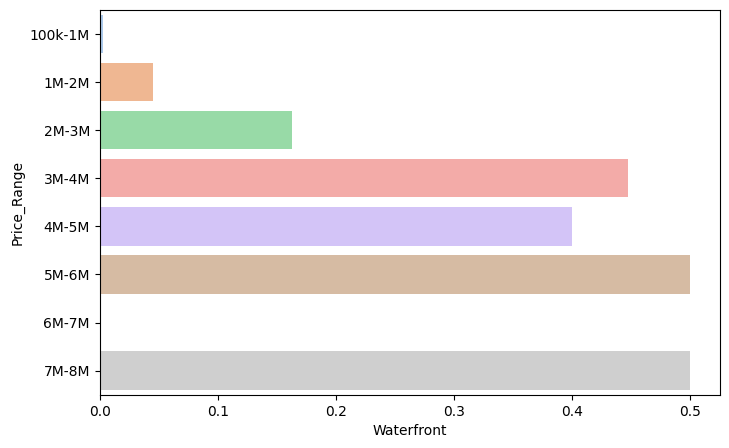

In [70]:

df_waterfront = df1.copy()
price_bins = [100000, 1000000, 2000000, 3000000,4000000,5000000,6000000, 7000000,8000000]
price_labels = ['100k-1M', '1M-2M', '2M-3M', '3M-4M','4M-5M','5M-6M','6M-7M','7M-8M']
df_waterfront['Price_Range'] = pd.cut(df_waterfront['Price'], bins=price_bins, labels=price_labels, right=False)
#df4= df3.groupby(['Grade_county','Overall_condition','Price_Range'])
sns.barplot(x = 'Waterfront', y='Price_Range', data = df_waterfront, ci = False, palette= 'pastel')

In [ ]:
sns.barplot(x = 'Waterfront', y='Price_Range', data = df3, ci = False, palette= 'pastel')

In [38]:
# Stakeholder required waterfront and have no budget limit (high budget)
#So take data for houses with waterfront.

df2 = df1.copy()

df3 = df2.query('Waterfront == 1 and Overall_condition >= 3 and Grade_county >= 8')
#df3 = Df3.reset_index()
#Df3.plot(x='House_id',y='Price',kind='scatter')


In [39]:
df3['Price'].describe()

count       110.000
mean    2022745.000
std     1133599.498
min      380000.000
25%     1207500.000
50%     1755000.000
75%     2675000.000
max     7060000.000
Name: Price, dtype: float64

In [40]:
df4= df3.groupby(['Grade_county','Overall_condition'])
                  
df4['Grade_county'].value_counts()

Grade_county  Overall_condition
8             3                    15
              4                    12
              5                     5
9             3                    11
              4                     8
              5                     3
10            3                    17
              4                     5
              5                     5
11            3                    13
              4                     5
              5                     1
12            3                     7
              4                     3
Name: count, dtype: int64

In [41]:
#Price sold is grouped by price-range bins

#price_bins = pd.IntervalIndex.from_tuples([(100000,1000000),(1000000,2000000),(2000000,3000000),(3000000,4000000),(4000000,5000000),(5000000,6000000),(6000000,7000000),(7000000,8000000)])
price_bins = [100000, 1000000, 2000000, 3000000,4000000,5000000,6000000, 7000000,8000000]
price_labels = ['100k-1M', '1M-2M', '2M-3M', '3M-4M','4M-5M','5M-6M','6M-7M','7M-8M']
df3['Price_Range'] = pd.cut(df3['Price'], bins=price_bins, labels=price_labels, right=False)
df4= df3.groupby(['Grade_county','Overall_condition','Price_Range'])

#df4.plot(kind='bar')
                  
df4['Grade_county'].value_counts()


                
#df3['Price_range'] = pd.cut(df3['Price'],bins=price_bins)
#df5 = df3.groupby('Price_range')
#df5['Price_range'].value_counts()

Grade_county  Overall_condition  Price_Range
8             3                  100k-1M        6
                                 1M-2M          8
                                 2M-3M          1
                                 3M-4M          0
                                 4M-5M          0
                                               ..
12            5                  3M-4M          0
                                 4M-5M          0
                                 5M-6M          0
                                 6M-7M          0
                                 7M-8M          0
Name: count, Length: 120, dtype: int64

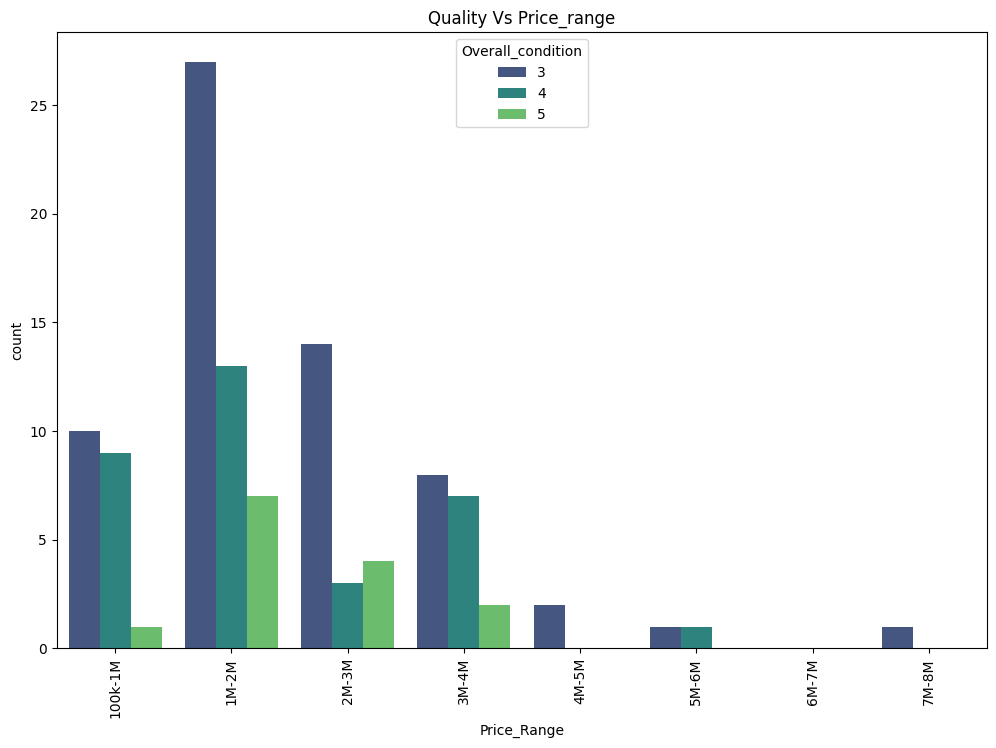

In [75]:

plt.figure(figsize = (12 , 8))
sns.countplot(x = 'Price_Range', hue = 'Overall_condition',data = df3, palette = 'viridis')
plt.title('Quality Vs Price_range')
plt.xticks(rotation = 90)
plt.show()

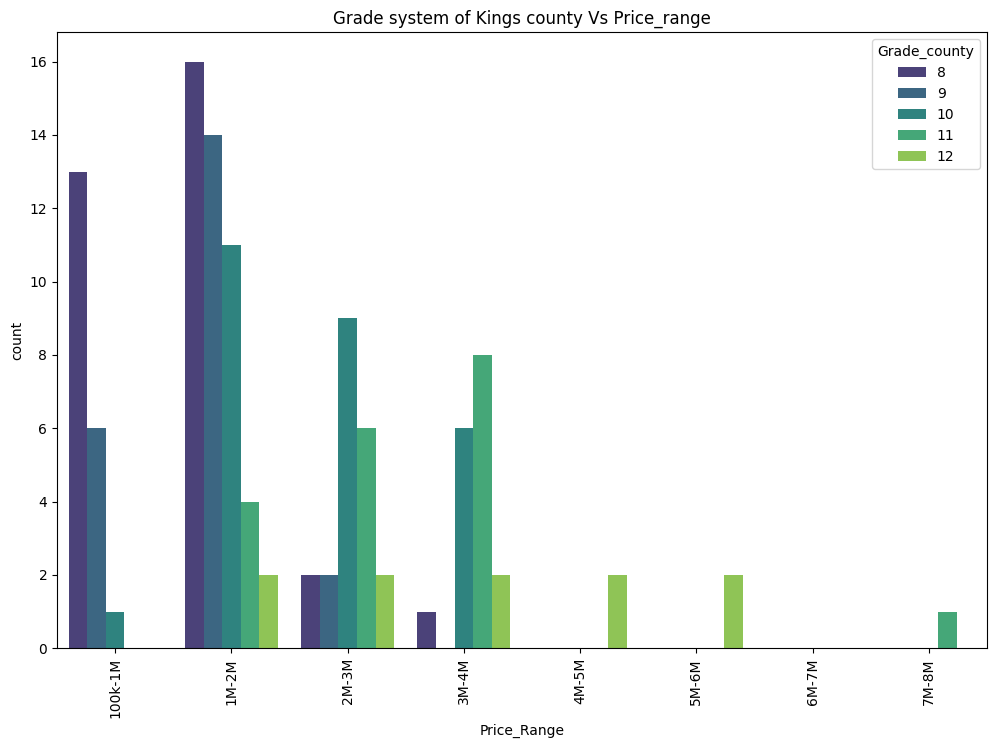

In [78]:
plt.figure(figsize = (12 , 8))
sns.countplot(x = 'Price_Range', hue = 'Grade_county',data = df3, palette = 'viridis')
plt.title('Grade system of Kings county Vs Price_range')
plt.xticks(rotation = 90)
plt.show()

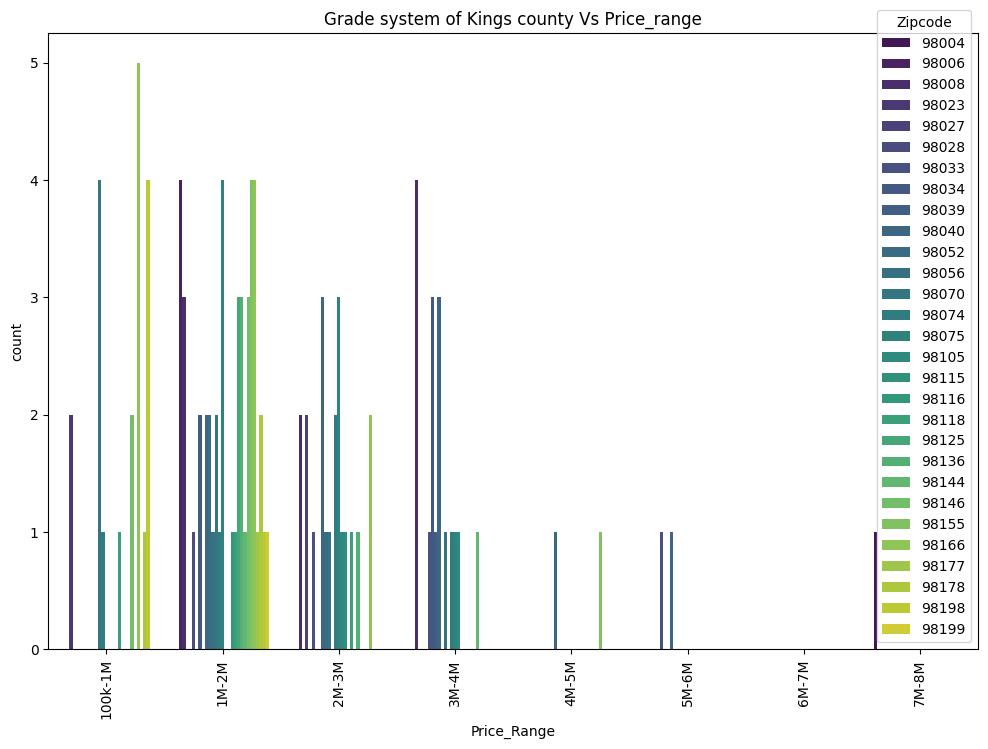

In [99]:
plt.figure(figsize = (12 , 8))
sns.countplot(x = 'Price_Range', hue = 'Zipcode',data = df3, palette = 'viridis')
plt.title('Grade system of Kings county Vs Price_range')
plt.xticks(rotation = 90)
plt.show()

In [116]:
import plotly.express as px
import pandas as pd


color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df3, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="House_id", 
                        #hover_data=["Address", "Listed"],
                        color="Overall_condition",
                        #color_continuous_scale=color_scale,
                        size="Price",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.write_image("images/geo.png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [113]:
# See weather there are new buildings with waterfront

df3.query('Year_built')

Year_built
2001-01-01    4
1965-01-01    3
2007-01-01    3
1980-01-01    3
1939-01-01    3
             ..
1967-01-01    1
1933-01-01    1
1970-01-01    1
1949-01-01    1
1953-01-01    1
Name: count, Length: 65, dtype: int64

In [103]:
df3['Zipcode'].value_counts()

Zipcode
98166    11
98040    10
98008     9
98075     8
98070     6
98074     5
98034     5
98198     5
98155     5
98146     5
98136     4
98006     4
98118     3
98056     3
98125     3
98178     3
98052     3
98033     3
98027     2
98105     2
98023     2
98144     2
98039     1
98115     1
98177     1
98199     1
98116     1
98004     1
98028     1
Name: count, dtype: int64

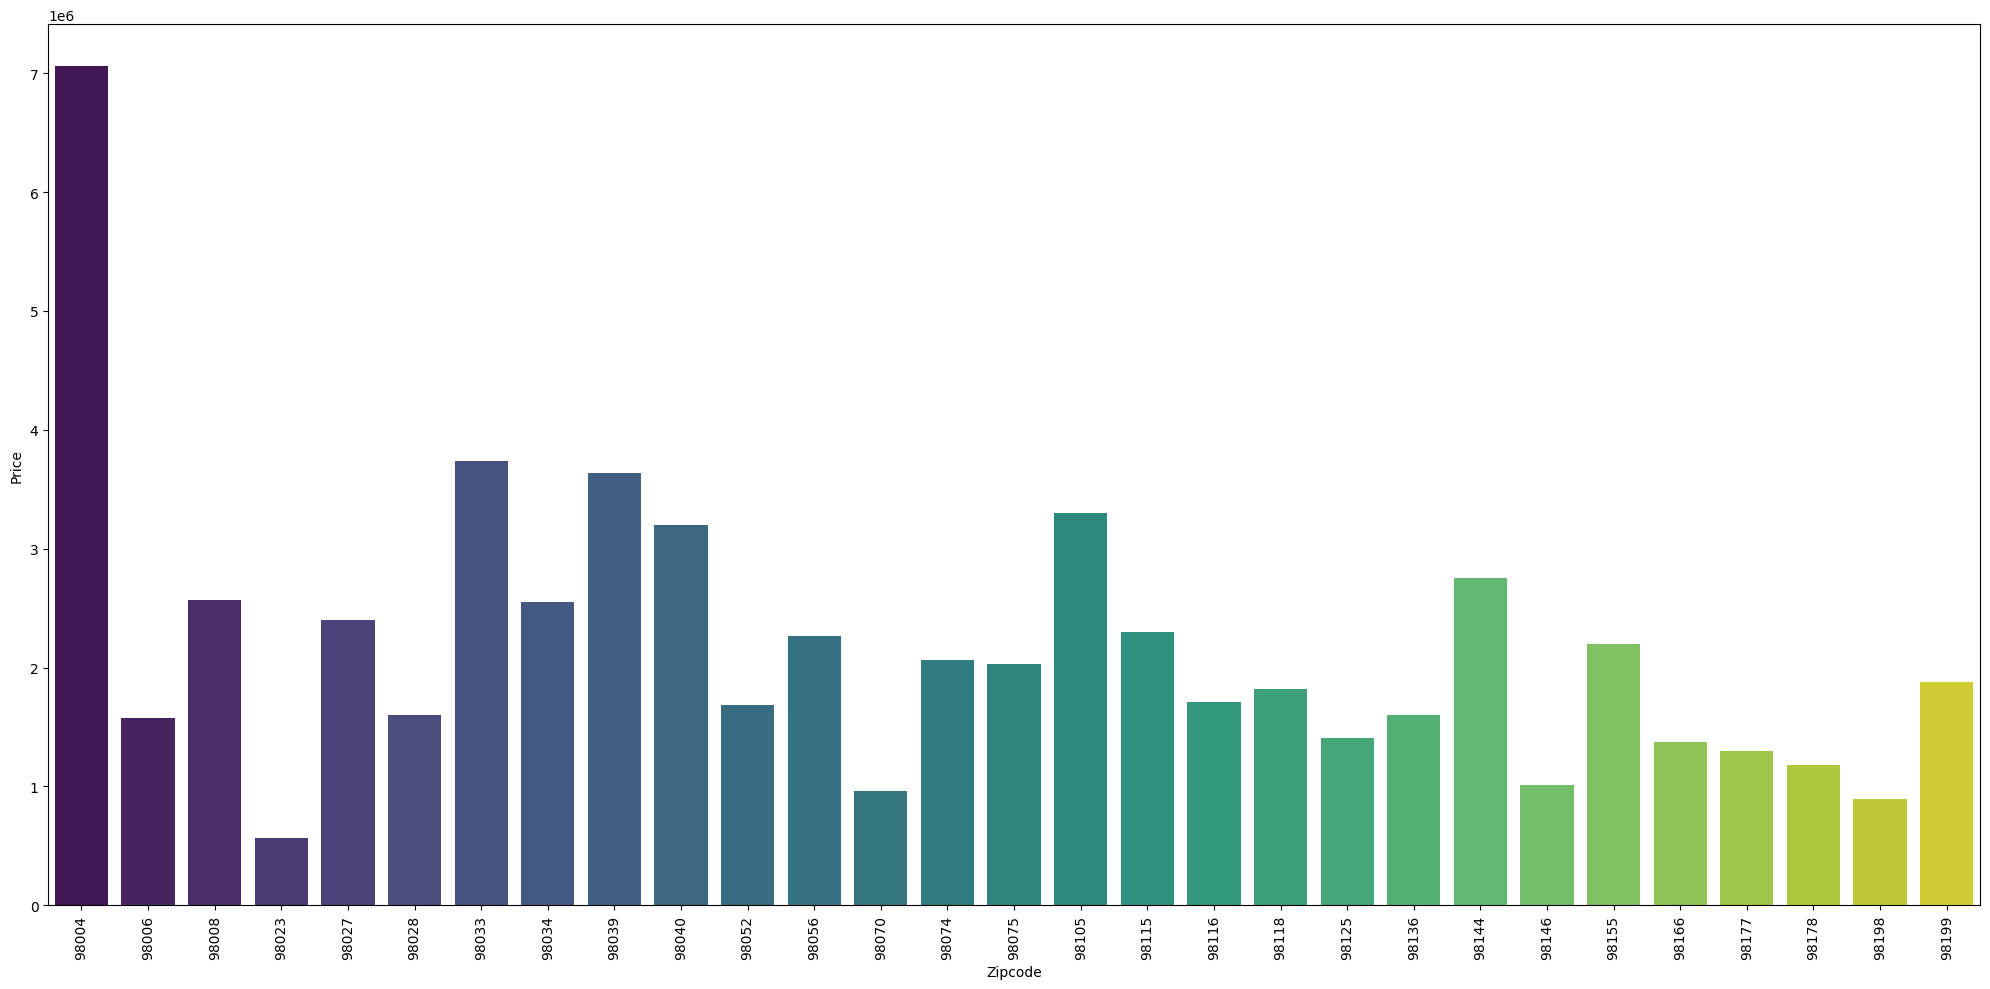

In [105]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Zipcode', y= 'Price', data = df3, palette = 'viridis',ci = False)
plt.xticks(rotation = 90)
plt.tight_layout()

In [108]:
##Want to check weather renovated have any significance in pricing

df_renovated = df_waterfront.copy()

df_renovated = df_renovated.query('Waterfront == 1 and Overall_condition >= 3 and Grade_county >= 8 and Year_Renovated > 0')

In [109]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_renovated, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Year_Renovated", 
                        #hover_data=["Address", "Listed"],
                        color="Overall_condition",
                        #color_continuous_scale=color_scale,
                        size="Price",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [112]:
df3['Year_built'].value_counts()

Year_built
2001-01-01    4
1965-01-01    3
2007-01-01    3
1980-01-01    3
1939-01-01    3
             ..
1967-01-01    1
1933-01-01    1
1970-01-01    1
1949-01-01    1
1953-01-01    1
Name: count, Length: 65, dtype: int64